Epoch [10/400], Train Loss: 0.7714804410934448, Test Loss: 0.6420851945877075, Accuracy: 0.6229507923126221
Epoch [20/400], Train Loss: 0.6912710070610046, Test Loss: 0.612053394317627, Accuracy: 0.7868852615356445
Epoch [30/400], Train Loss: 0.6764208078384399, Test Loss: 0.6175856590270996, Accuracy: 0.7868852615356445
Epoch [40/400], Train Loss: 0.6878004670143127, Test Loss: 0.5994059443473816, Accuracy: 0.8032786846160889
Epoch [50/400], Train Loss: 0.6642955541610718, Test Loss: 0.572535514831543, Accuracy: 0.8032786846160889
Epoch [60/400], Train Loss: 0.6315175890922546, Test Loss: 0.5796229243278503, Accuracy: 0.7868852615356445
Epoch [70/400], Train Loss: 0.6192756295204163, Test Loss: 0.5729933381080627, Accuracy: 0.8196721076965332
Epoch [80/400], Train Loss: 0.6388297080993652, Test Loss: 0.5432493686676025, Accuracy: 0.8032786846160889
Epoch [90/400], Train Loss: 0.636362612247467, Test Loss: 0.561640739440918, Accuracy: 0.7868852615356445
Epoch [100/400], Train Loss: 0.6

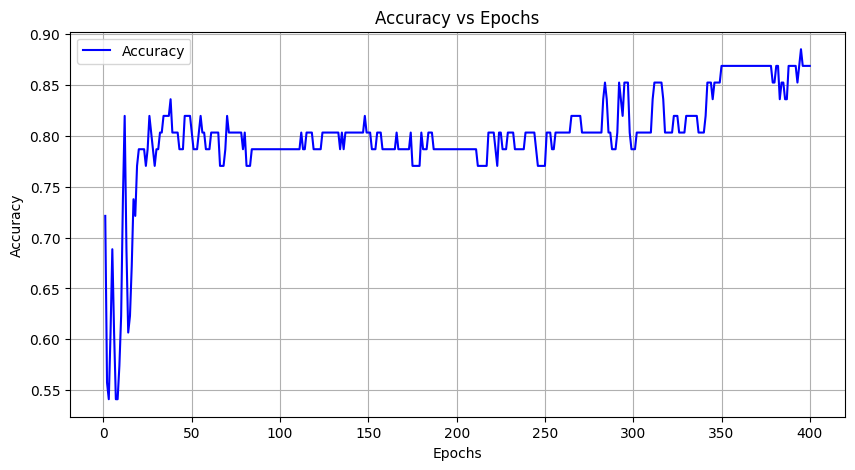

In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load CSV data into a DataFrame
df = pd.read_csv('heart.csv')

# Define features and target variable
X = df.drop(columns=['output']).values  # Features
y = df['output'].values  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a neural network architecture for binary classification
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_size):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Initialize the model
input_size = X_train_tensor.shape[1]
model = HeartDiseaseModel(input_size)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store accuracy and loss
train_losses = []
test_losses = []
accuracies = []

# Train the model
num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    # Evaluate the model on test data
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        test_loss = criterion(outputs, y_test_tensor)
        test_losses.append(test_loss.item())
        predictions = torch.round(outputs)
        accuracy = (predictions == y_test_tensor).float().mean().item()
        accuracies.append(accuracy)
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item()}, Test Loss: {test_loss.item()}, Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), accuracies, label='Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.grid(True)
plt.legend()
plt.show()



In [26]:
import torch

# Define the function to take user input
def get_user_input():
    print("Enter the following information:")
    age = float(input("Age (years): "))
    sex = float(input("Sex (0 for female, 1 for male): "))
    cp = float(input("Chest Pain Type (0-3): "))
    trestbps = float(input("Resting Blood Pressure (mm Hg): "))
    chol = float(input("Serum Cholesterol (mg/dl): "))
    fbs = float(input("Fasting Blood Sugar (> 120 mg/dl) (0 for No, 1 for Yes): "))
    restecg = float(input("Resting Electrocardiographic Results (0-2): "))
    thalach = float(input("Maximum Heart Rate Achieved (bpm): "))
    exang = float(input("Exercise Induced Angina (0 for No, 1 for Yes): "))
    oldpeak = float(input("ST Depression Induced by Exercise Relative to Rest: "))
    slope = float(input("Slope of the Peak Exercise ST Segment (0-2): "))
    ca = float(input("Number of Major Vessels Colored by Fluoroscopy (0-3): "))
    thal = float(input("Thalassemia (0-3): "))
    
    # Return the user input as a tensor
    user_input = torch.tensor([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]], dtype=torch.float32)
    return user_input

# Load the trained model
model = HeartDiseaseModel(input_size)
model.load_state_dict(torch.load('heart_disease_model.pth'))  # Load the trained model

# Evaluate the model on user input
user_input = get_user_input()
model.eval()
with torch.no_grad():
    prediction = model(user_input)
    predicted_class = torch.round(prediction).item()
    if predicted_class == 1:
        print("The model predicts that you have a high risk of heart attack.")
    else:
        print("The model predicts that you have a low risk of heart attack.")


Enter the following information:


Age (years):  22
Sex (0 for female, 1 for male):  0
Chest Pain Type (0-3):  3
Resting Blood Pressure (mm Hg):  2
Serum Cholesterol (mg/dl):  3
Fasting Blood Sugar (> 120 mg/dl) (0 for No, 1 for Yes):  0
Resting Electrocardiographic Results (0-2):  2
Maximum Heart Rate Achieved (bpm):  78
Exercise Induced Angina (0 for No, 1 for Yes):  1
ST Depression Induced by Exercise Relative to Rest:  2
Slope of the Peak Exercise ST Segment (0-2):  2
Number of Major Vessels Colored by Fluoroscopy (0-3):  2
Thalassemia (0-3):  2


The model predicts that you have a high risk of heart attack.


In [25]:
# After training the model
torch.save(model.state_dict(), 'heart_disease_model.pth')


In [27]:
model = HeartDiseaseModel(input_size)
model.load_state_dict(torch.load('heart_disease_model.pth'))
model.eval()


HeartDiseaseModel(
  (fc1): Linear(in_features=13, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)